In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data

In [2]:
# Hospital Adm
df_hospital_adm = pd.read_csv("data/df_betim.csv")
# Weather
df_weather = pd.read_csv("data/days_weather_pampulha.csv")
# Air Q.
df_air_qual = pd.read_csv("data/betim_pivot_bairro.csv")

# Name for final dataset (save)
final_dataset_name='df_final_betim_bairro.csv'

In [3]:
df_hospital_adm.rename(columns={"DT_INTER": 'Date'}, inplace=True)

In [4]:
df_hospital_adm['Date'] = pd.to_datetime(df_hospital_adm['Date'], format='%Y%m%d')
df_hospital_adm.head()

,Date,NUMBER_INT
0,2012-01-01,2
1,2012-01-02,1
2,2012-01-03,1
3,2012-01-04,3
4,2012-01-05,1


In [5]:
df_hospital_adm.isnull().sum()

Date          0
NUMBER_INT    0
dtype: int64

In [6]:
df_weather['Date'] = pd.to_datetime(df_weather['Date'])
df_weather.head()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min
0,2015-01-01,Thu,3,0,33.9,20.6,89.0,32.0
1,2015-01-02,Fri,4,0,32.9,21.0,87.0,38.0
2,2015-01-03,Sat,5,1,33.5,20.2,83.0,38.0
3,2015-01-04,Sun,6,1,30.6,22.2,81.0,43.0
4,2015-01-05,Mon,0,0,30.8,20.8,79.0,36.0


In [7]:
df_weather_hospital_adm = pd.merge(df_weather, df_hospital_adm, on='Date', how='left')

In [8]:
df_weather_hospital_adm.head(20)

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT
0,2015-01-01,Thu,3,0,33.9,20.6,89.0,32.0,2.0
1,2015-01-02,Fri,4,0,32.9,21.0,87.0,38.0,2.0
2,2015-01-03,Sat,5,1,33.5,20.2,83.0,38.0,2.0
3,2015-01-04,Sun,6,1,30.6,22.2,81.0,43.0,1.0
4,2015-01-05,Mon,0,0,30.8,20.8,79.0,36.0,4.0
5,2015-01-06,Tue,1,0,29.5,20.5,79.0,41.0,3.0
6,2015-01-07,Wed,2,0,28.0,19.9,78.0,44.0,3.0
7,2015-01-08,Thu,3,0,30.4,19.7,74.0,30.0,3.0
8,2015-01-09,Fri,4,0,30.5,19.6,68.0,28.0,2.0
9,2015-01-10,Sat,5,1,32.6,20.6,73.0,33.0,NaN


In [9]:
df_weather_hospital_adm.describe()

,Date,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1611.000000
mean,2017-07-01 12:00:00,3.000548,0.285871,28.314513,17.791347,82.264513,40.261227,3.066418
min,2015-01-01 00:00:00,0.000000,0.000000,17.800000,7.300000,42.000000,10.000000,1.000000
25%,2016-04-01 06:00:00,1.000000,0.000000,26.300000,16.100000,77.000000,32.000000,1.000000
50%,2017-07-01 12:00:00,3.000000,0.000000,28.500000,18.400000,84.000000,39.000000,3.000000
75%,2018-09-30 18:00:00,5.000000,1.000000,30.475000,19.700000,90.000000,48.000000,4.000000
max,2019-12-31 00:00:00,6.000000,1.000000,37.700000,24.100000,94.000000,91.000000,12.000000
std,NaN,2.000959,0.451952,3.044044,2.625865,9.226503,12.646520,2.050889


In [10]:
df_weather_hospital_adm.isnull().sum()

Date              0
DayOfWeek         0
DayOfWeekNum      0
IsWeekend         0
temp_max          0
temp_min          0
humidity_max      0
humidity_min      0
NUMBER_INT      215
dtype: int64

In [11]:
# Days with no hospital admi
df_weather_hospital_adm['NUMBER_INT'] = df_weather_hospital_adm['NUMBER_INT'].fillna(0.0)

In [12]:
df_weather_hospital_adm.isnull().sum()

Date            0
DayOfWeek       0
DayOfWeekNum    0
IsWeekend       0
temp_max        0
temp_min        0
humidity_max    0
humidity_min    0
NUMBER_INT      0
dtype: int64

In [13]:
df_weather_hospital_adm.tail()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT
1821,2019-12-27,Fri,4,0,29.1,19.9,83.0,40.0,2.0
1822,2019-12-28,Sat,5,1,28.6,19.7,88.0,44.0,1.0
1823,2019-12-29,Sun,6,1,29.4,18.8,90.0,40.0,0.0
1824,2019-12-30,Mon,0,0,29.3,18.1,84.0,32.0,1.0
1825,2019-12-31,Tue,1,0,29.9,18.8,79.0,37.0,1.0


In [14]:
df_air_qual.head()

,Data,CO,MP10,O3,MP2.5,SO2
0,01/01/2015,NaN,24.0,56.0,NaN,0.0
1,01/01/2016,NaN,32.0,50.0,46.0,0.0
2,01/01/2018,0.0,NaN,41.0,NaN,0.0
3,01/01/2019,1.0,NaN,34.0,NaN,2.0
4,01/01/2020,0.0,15.0,29.0,12.0,0.0


In [15]:
# df_air_qual['Data'] = pd.to_datetime(df_air_qual['Data'], format='%d/%m/%Y').dt.strftime('%Y%m%d').astype(int)
df_air_qual['Data'] = pd.to_datetime(df_air_qual['Data'], format='%d/%m/%Y')

df_air_qual.head(20)

,Data,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,NaN,24.0,56.0,NaN,0.0
1,2016-01-01,NaN,32.0,50.0,46.0,0.0
2,2018-01-01,0.0,NaN,41.0,NaN,0.0
3,2019-01-01,1.0,NaN,34.0,NaN,2.0
4,2020-01-01,0.0,15.0,29.0,12.0,0.0
5,2021-01-01,0.0,10.0,55.0,27.0,0.0
6,2022-01-01,1.0,10.0,16.0,10.0,0.0
7,2015-02-01,0.0,21.0,69.0,NaN,2.0
8,2016-02-01,0.0,22.0,50.0,10.0,2.0
9,2017-02-01,NaN,26.0,50.0,NaN,0.0


In [16]:
df_air_qual.rename(columns={'Data': 'Date'}, inplace= True)

In [17]:
df_weather_hospital_adm_air_qual = pd.merge(df_weather_hospital_adm, df_air_qual, on='Date', how='left')


In [18]:
df_weather_hospital_adm_air_qual.head()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
0,2015-01-01,Thu,3,0,33.9,20.6,89.0,32.0,2.0,NaN,24.0,56.0,NaN,0.0
1,2015-01-02,Fri,4,0,32.9,21.0,87.0,38.0,2.0,NaN,29.0,55.0,NaN,2.0
2,2015-01-03,Sat,5,1,33.5,20.2,83.0,38.0,2.0,1.0,38.0,74.0,NaN,0.0
3,2015-01-04,Sun,6,1,30.6,22.2,81.0,43.0,1.0,1.0,22.0,69.0,NaN,0.0
4,2015-01-05,Mon,0,0,30.8,20.8,79.0,36.0,4.0,0.0,19.0,54.0,NaN,0.0


In [19]:
df_weather_hospital_adm_air_qual.tail()

,Date,DayOfWeek,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
1821,2019-12-27,Fri,4,0,29.1,19.9,83.0,40.0,2.0,0.0,13.0,30.0,NaN,4.0
1822,2019-12-28,Sat,5,1,28.6,19.7,88.0,44.0,1.0,0.0,17.0,25.0,12.0,4.0
1823,2019-12-29,Sun,6,1,29.4,18.8,90.0,40.0,0.0,0.0,14.0,40.0,9.0,2.0
1824,2019-12-30,Mon,0,0,29.3,18.1,84.0,32.0,1.0,0.0,13.0,44.0,NaN,2.0
1825,2019-12-31,Tue,1,0,29.9,18.8,79.0,37.0,1.0,0.0,14.0,36.0,NaN,6.0


## export final dataset

In [20]:
df_weather_hospital_adm_air_qual.to_csv(final_dataset_name, index=False)

## Stats

In [21]:
df_weather_hospital_adm_air_qual.dtypes

Date            datetime64[ns]
DayOfWeek               object
DayOfWeekNum             int64
IsWeekend                int64
temp_max               float64
temp_min               float64
humidity_max           float64
humidity_min           float64
NUMBER_INT             float64
CO                     float64
MP10                   float64
O3                     float64
MP2.5                  float64
SO2                    float64
dtype: object

In [22]:
df_weather_hospital_adm_air_qual.count()

Date            1826
DayOfWeek       1826
DayOfWeekNum    1826
IsWeekend       1826
temp_max        1826
temp_min        1826
humidity_max    1826
humidity_min    1826
NUMBER_INT      1826
CO              1591
MP10            1519
O3              1638
MP2.5           1102
SO2             1660
dtype: int64

In [23]:
df_weather_hospital_adm_air_qual.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,1826,2017-07-01 12:00:00,2015-01-01 00:00:00,2016-04-01 06:00:00,2017-07-01 12:00:00,2018-09-30 18:00:00,2019-12-31 00:00:00,NaN
DayOfWeekNum,1826.0,3.000548,0.0,1.0,3.0,5.0,6.0,2.000959
IsWeekend,1826.0,0.285871,0.0,0.0,0.0,1.0,1.0,0.451952
temp_max,1826.0,28.314513,17.8,26.3,28.5,30.475,37.7,3.044044
temp_min,1826.0,17.791347,7.3,16.1,18.4,19.7,24.1,2.625865
humidity_max,1826.0,82.264513,42.0,77.0,84.0,90.0,94.0,9.226503
humidity_min,1826.0,40.261227,10.0,32.0,39.0,48.0,91.0,12.64652
NUMBER_INT,1826.0,2.705367,0.0,1.0,2.0,4.0,12.0,2.165165
CO,1591.0,0.514771,0.0,0.0,1.0,1.0,1.0,0.499939
MP10,1519.0,31.609612,6.0,22.0,29.0,38.0,111.0,13.871457


In [24]:
df_weather_hospital_adm_air_qual.describe()

,Date,DayOfWeekNum,IsWeekend,temp_max,temp_min,humidity_max,humidity_min,NUMBER_INT,CO,MP10,O3,MP2.5,SO2
count,1826,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1591.000000,1519.000000,1638.000000,1102.000000,1660.000000
mean,2017-07-01 12:00:00,3.000548,0.285871,28.314513,17.791347,82.264513,40.261227,2.705367,0.514771,31.609612,45.684982,29.107985,3.394578
min,2015-01-01 00:00:00,0.000000,0.000000,17.800000,7.300000,42.000000,10.000000,0.000000,0.000000,6.000000,9.000000,3.000000,0.000000
25%,2016-04-01 06:00:00,1.000000,0.000000,26.300000,16.100000,77.000000,32.000000,1.000000,0.000000,22.000000,36.000000,11.000000,0.000000
50%,2017-07-01 12:00:00,3.000000,0.000000,28.500000,18.400000,84.000000,39.000000,2.000000,1.000000,29.000000,45.000000,30.000000,2.000000
75%,2018-09-30 18:00:00,5.000000,1.000000,30.475000,19.700000,90.000000,48.000000,4.000000,1.000000,38.000000,55.000000,38.000000,4.000000
max,2019-12-31 00:00:00,6.000000,1.000000,37.700000,24.100000,94.000000,91.000000,12.000000,1.000000,111.000000,129.000000,114.000000,51.000000
std,NaN,2.000959,0.451952,3.044044,2.625865,9.226503,12.646520,2.165165,0.499939,13.871457,14.546776,17.243149,4.495564


In [25]:
df_weather_hospital_adm_air_qual.isnull().sum()


Date              0
DayOfWeek         0
DayOfWeekNum      0
IsWeekend         0
temp_max          0
temp_min          0
humidity_max      0
humidity_min      0
NUMBER_INT        0
CO              235
MP10            307
O3              188
MP2.5           724
SO2             166
dtype: int64

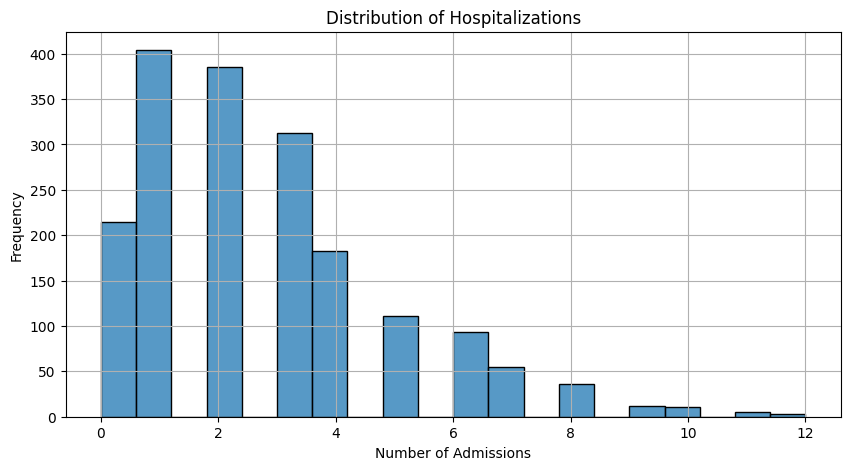

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df_weather_hospital_adm_air_qual['NUMBER_INT'], bins=20)
plt.title('Distribution of Hospitalizations')
plt.xlabel('Number of Admissions')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

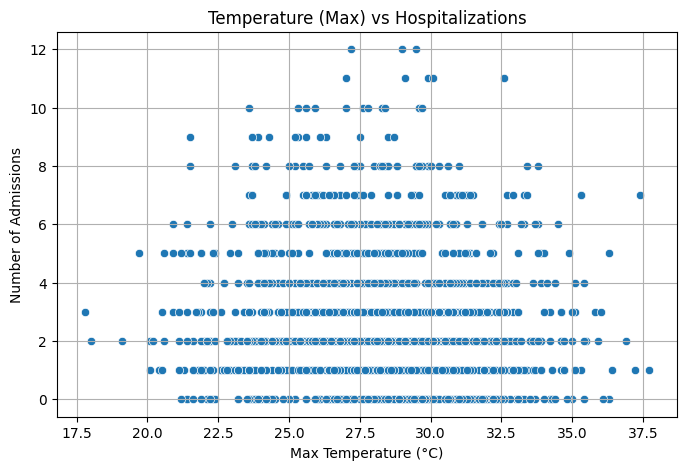

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp_max', y='NUMBER_INT', data=df_weather_hospital_adm_air_qual)
plt.title('Temperature (Max) vs Hospitalizations')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()


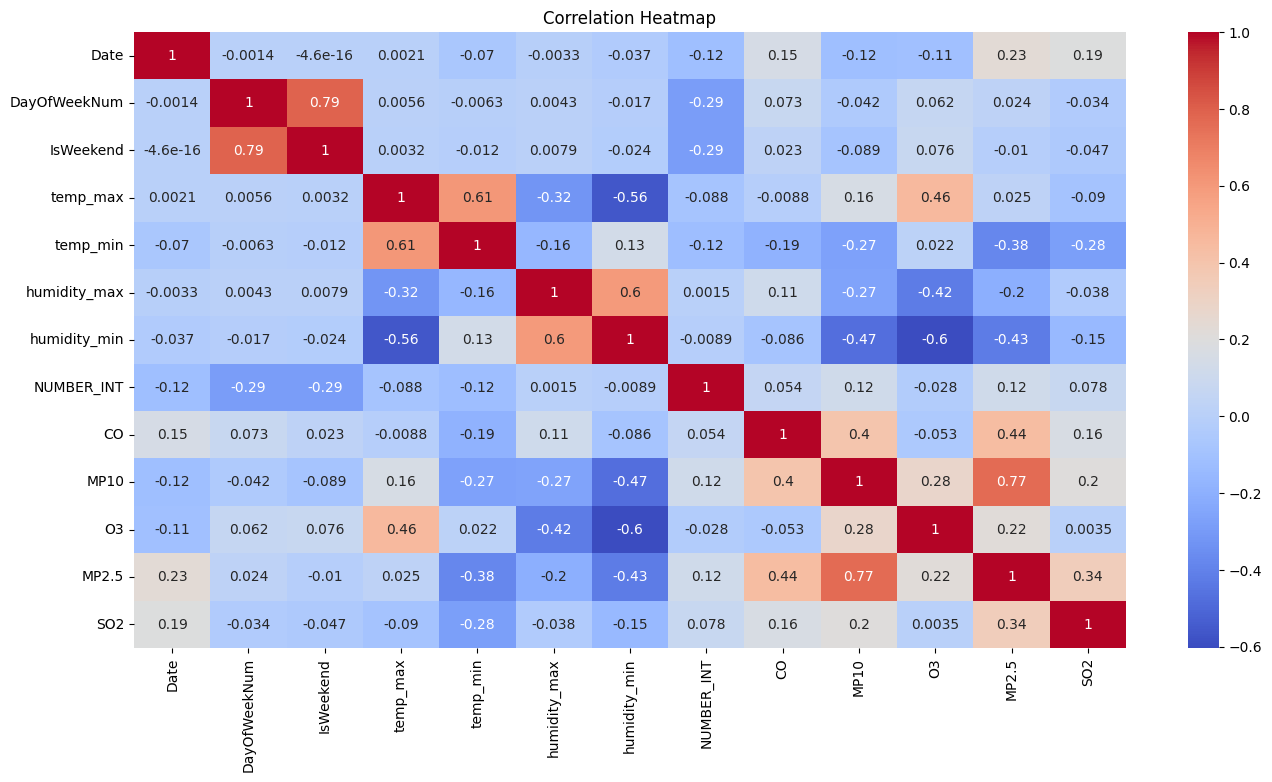

In [28]:
selected_columns = [
    'Date', 'DayOfWeekNum', 'IsWeekend', 
    'temp_max', 'temp_min', 'humidity_max', 
    'humidity_min', 'NUMBER_INT', 
    'CO', 'MP10', 'O3', 'MP2.5', 'SO2'
]

df_selected_num = df_weather_hospital_adm_air_qual[selected_columns]

correlation_matrix = df_selected_num.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [29]:
df_selected_num.corr()['NUMBER_INT'].sort_values(ascending=False)


NUMBER_INT      1.000000
MP2.5           0.121980
MP10            0.119134
SO2             0.078430
CO              0.054374
humidity_max    0.001517
humidity_min   -0.008934
O3             -0.028187
temp_max       -0.088457
Date           -0.116607
temp_min       -0.123021
IsWeekend      -0.285690
DayOfWeekNum   -0.288075
Name: NUMBER_INT, dtype: float64

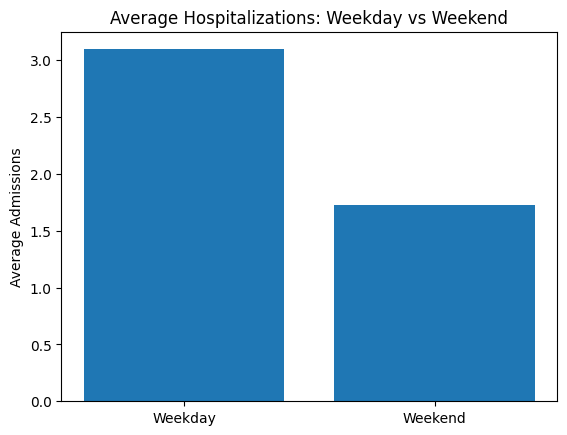

In [30]:
weekend_vs_weekday = df_weather_hospital_adm_air_qual.groupby('IsWeekend')['NUMBER_INT'].mean()
plt.bar(['Weekday', 'Weekend'], weekend_vs_weekday)
plt.title('Average Hospitalizations: Weekday vs Weekend')
plt.ylabel('Average Admissions')
plt.show()

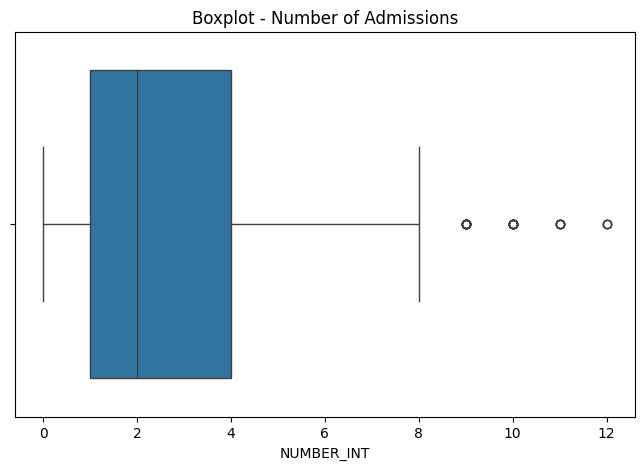

In [31]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_weather_hospital_adm_air_qual['NUMBER_INT'])
plt.title('Boxplot - Number of Admissions')
plt.show()

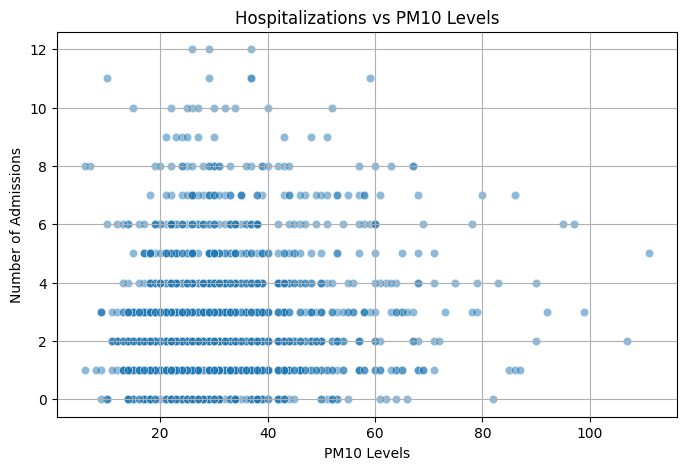

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='MP10', y='NUMBER_INT', data=df_weather_hospital_adm_air_qual, alpha=0.5)
plt.title('Hospitalizations vs PM10 Levels')
plt.xlabel('PM10 Levels')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

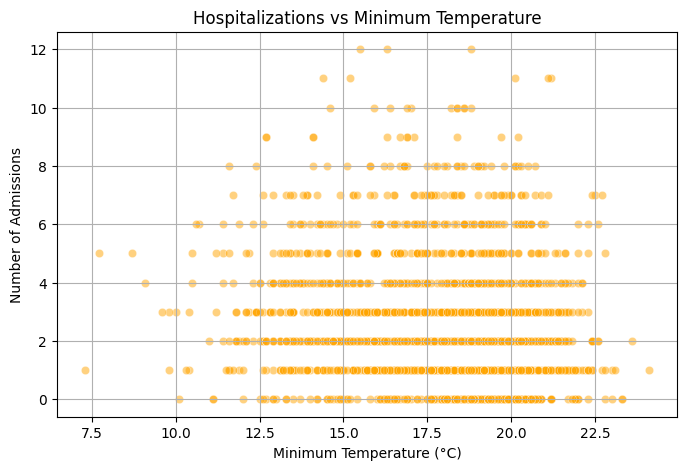

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='temp_min', y='NUMBER_INT', data=df_weather_hospital_adm_air_qual, alpha=0.5, color='orange')
plt.title('Hospitalizations vs Minimum Temperature')
plt.xlabel('Minimum Temperature (°C)')
plt.ylabel('Number of Admissions')
plt.grid(True)
plt.show()

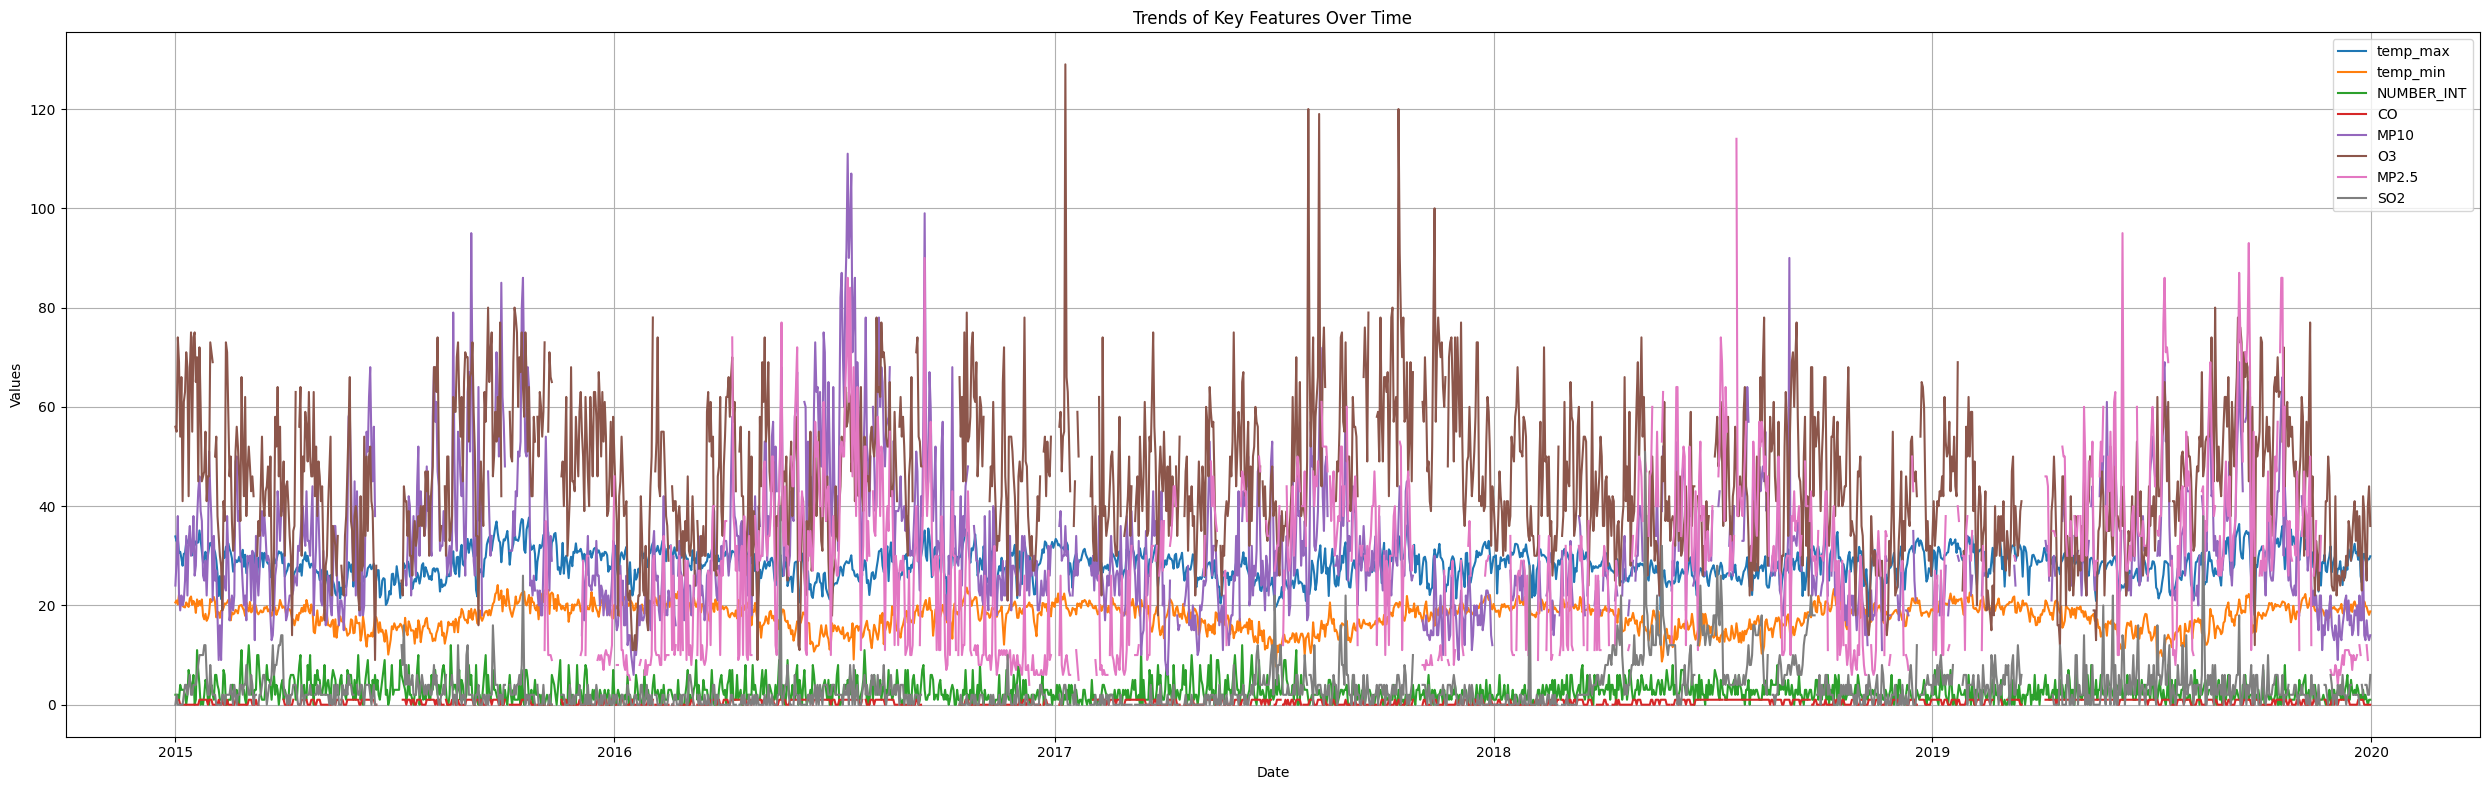

In [34]:

plt.figure(figsize=(25, 8))

df_weather_hospital_adm_air_qual_copy = df_weather_hospital_adm_air_qual.copy()

df_weather_hospital_adm_air_qual_copy['Date'] = pd.to_datetime(df_weather_hospital_adm_air_qual_copy['Date'], format='%Y%m%d')

features_plot = [
    'temp_max', 'temp_min', 'NUMBER_INT',
    'CO', 'MP10', 'O3', 'MP2.5', 'SO2'
]



for feature in features_plot:
    plt.plot(df_weather_hospital_adm_air_qual_copy['Date'], 
             df_weather_hospital_adm_air_qual_copy[feature], 
             label=feature)

plt.title('Trends of Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

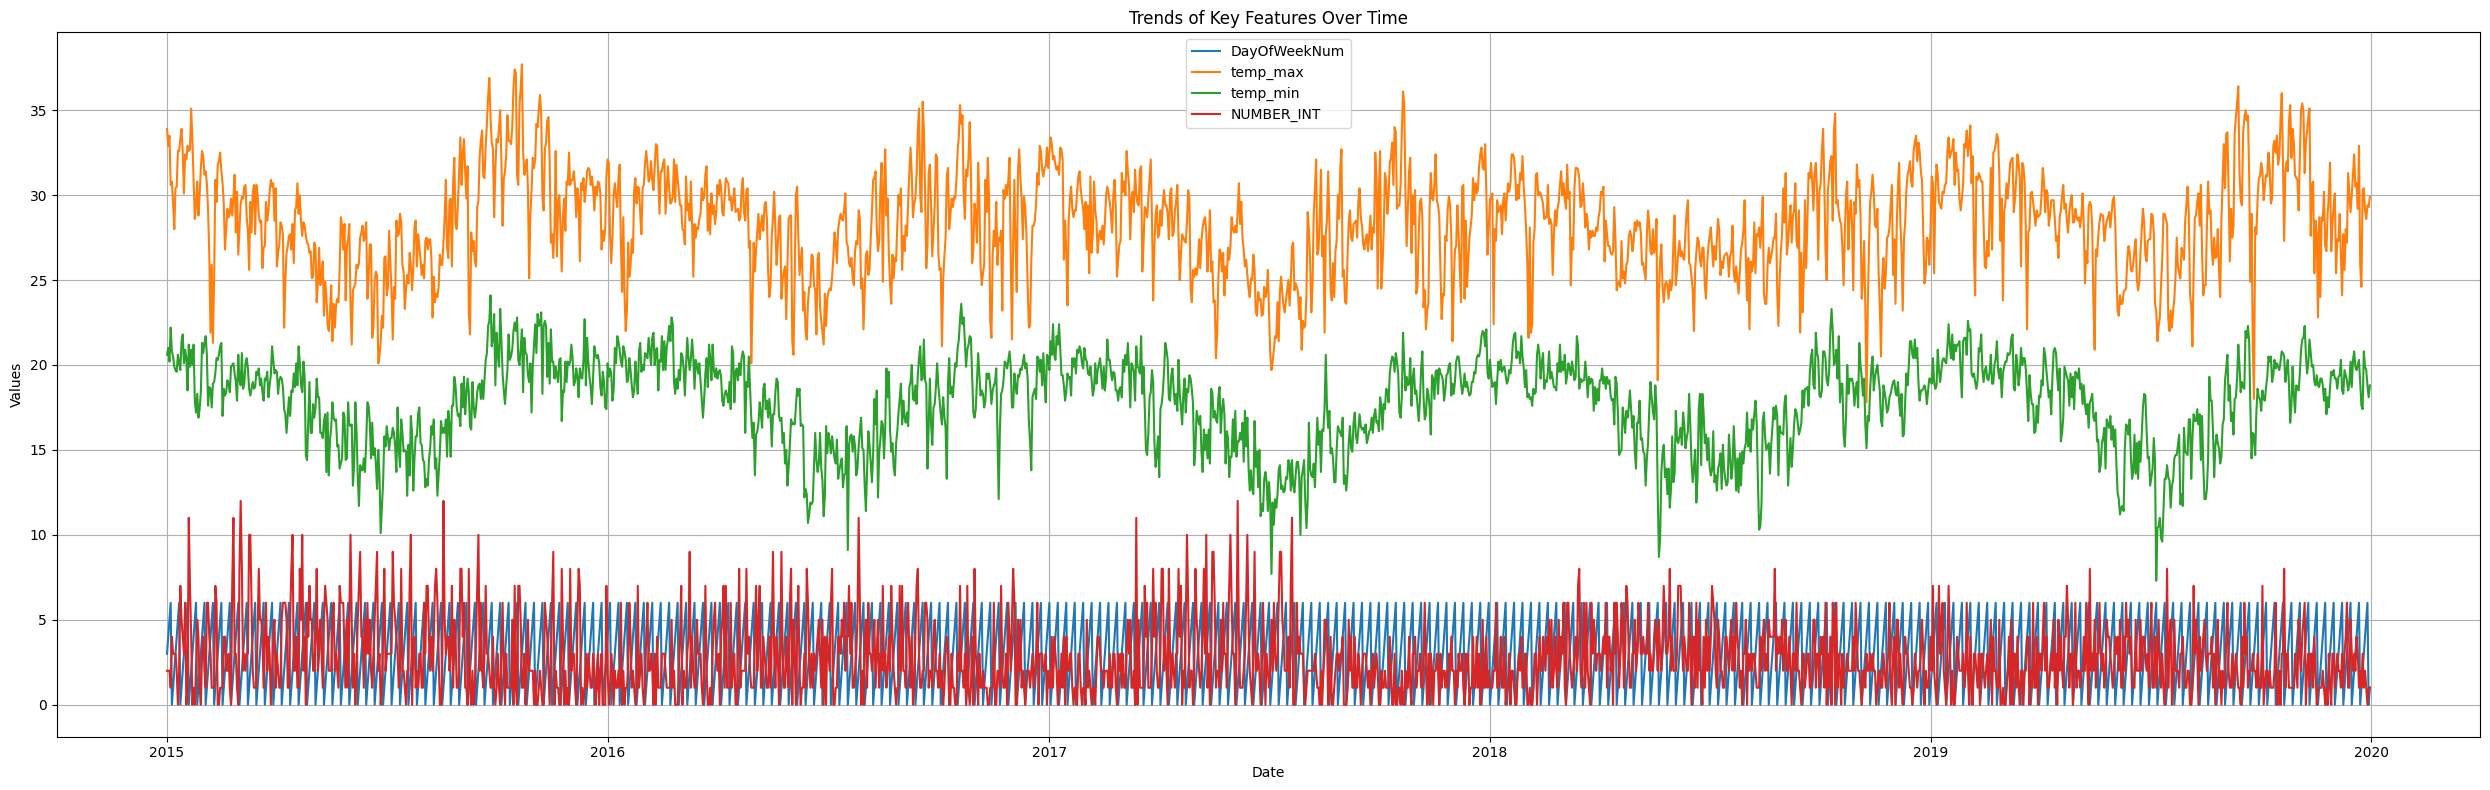

In [35]:
plt.figure(figsize=(25, 8))

features_plot_with_day = [
    'DayOfWeekNum',
    'temp_max', 
    'temp_min', 
    'NUMBER_INT'
]



for feature in features_plot_with_day:
    plt.plot(df_weather_hospital_adm_air_qual_copy['Date'], 
             df_weather_hospital_adm_air_qual_copy[feature], 
             label=feature)

plt.title('Trends of Key Features Over Time')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

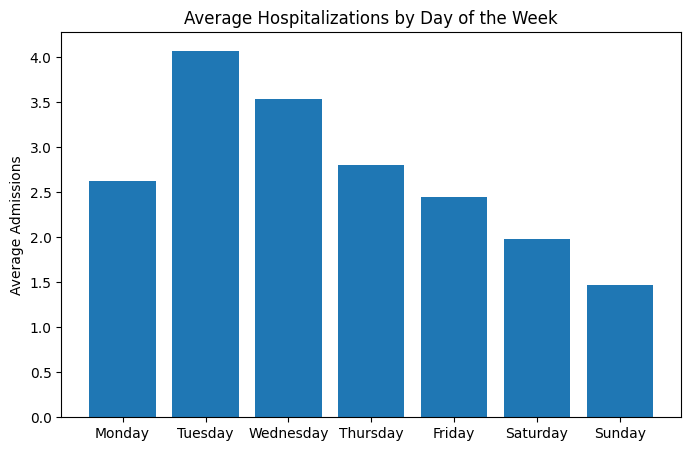

In [36]:
weekdays_avg = df_weather_hospital_adm_air_qual.groupby('DayOfWeekNum')['NUMBER_INT'].mean()

day_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 5))
plt.bar(day_labels, weekdays_avg)
plt.title('Average Hospitalizations by Day of the Week')
plt.ylabel('Average Admissions')
plt.show()